In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/SamLv0114/Tandon-Bootcamp/main/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
# Check how many null values are there
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
# After dealing with the null values, we drop off some unrelated columns
df.drop(["id", "name", "host_name", "host_id", "last_review","latitude","longitude","calculated_host_listings_count"], axis=1, inplace=True)
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,0


In [6]:
# Replace the null values for reviews_per_month column with zero
df["reviews_per_month"].fillna(0, inplace=True)

C:\Users\TerryLu\AppData\Local\Temp\ipykernel_7132\3653847578.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["reviews_per_month"].fillna(0, inplace=True)


In [7]:
# Now check again for the number of null values
df.isnull().sum()

neighbourhood_group    0
neighbourhood          0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
availability_365       0
dtype: int64

In [8]:
# Visualize each neighbourhodd_group's counts
df["neighbourhood_group"].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

<Axes: xlabel='neighbourhood_group', ylabel='count'>

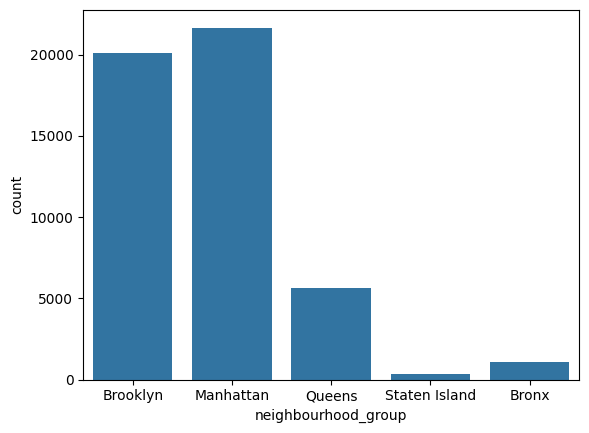

In [9]:
# Check the count for each type of neigbourhood group
sns.countplot(x="neighbourhood_group", data=df)

In [10]:
room_type_counts_prices = df.groupby(['room_type','neighbourhood_group'])['price'].mean().reset_index()
room_type_counts_prices

,room_type,neighbourhood_group,price
0,Entire home/apt,Bronx,127.506596
1,Entire home/apt,Brooklyn,178.327545
2,Entire home/apt,Manhattan,249.239109
3,Entire home/apt,Queens,147.050573
4,Entire home/apt,Staten Island,173.846591
5,Private room,Bronx,66.788344
6,Private room,Brooklyn,76.500099
7,Private room,Manhattan,116.776622
8,Private room,Queens,71.762456
9,Private room,Staten Island,62.292553


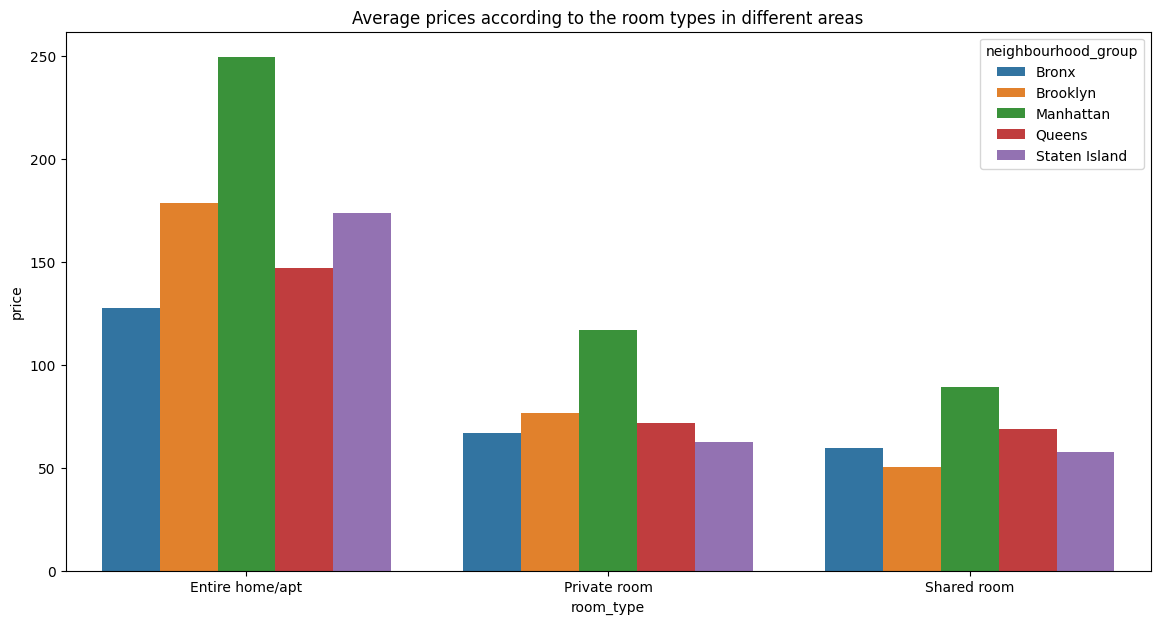

In [11]:
plt.figure(figsize = [14 , 7])
sns.barplot(data = room_type_counts_prices , x = 'room_type' , y = 'price' , hue = 'neighbourhood_group')
plt.title('Average prices according to the room types in different areas')
plt.show()

In [12]:
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,355
2,Manhattan,Harlem,Private room,150,3,0,0.00,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,0


In [13]:
# Encode Categorical Variabbles
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['neighbourhood_group']=le.fit_transform(df['neighbourhood_group'])

le = LabelEncoder()
df['neighbourhood']=le.fit_transform(df['neighbourhood'])

le =LabelEncoder()
df['room_type']=le.fit_transform(df['room_type'])


df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,1,108,1,149,1,9,0.21,365
1,2,127,0,225,1,45,0.38,355
2,2,94,1,150,3,0,0.00,365
3,1,41,0,89,1,270,4.64,194
4,2,61,0,80,10,9,0.10,0


In [14]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
reg = LinearRegression()
df=df[df.price>0]
df=df[df.availability_365>0]

X = df[['neighbourhood_group','neighbourhood','room_type','minimum_nights','number_of_reviews','reviews_per_month','availability_365']]
# Prices are not normally distributed as well as there is a lot of noise. Logarithmic conversion of data with huge variance can be normalized by logarithmic algorithm.
y= np.log10(df['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

reg.fit(X_train,y_train)
from sklearn.metrics import mean_absolute_error
y_pred = reg.predict(X_test)

print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

print(reg.coef_)
reg.intercept_

NameError: name 'r2' is not defined

In [ ]:
# LASSO
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Lasso_model = linear_model.Lasso(alpha = 0.001)
Lasso_model.fit(X_train, y_train)
y_predicts = Lasso_model.predict(X_test)
# Evaluating the model

r2 = r2_score(y_test, y_predicts)
mae = mean_absolute_error(y_test, y_predicts)
mse = mean_squared_error(y_test, y_predicts)

print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

R2 Score: 0.5159111019004682
Mean Absolute Error: 0.15782445118830715
Mean Squared Error: 0.04742855204709873


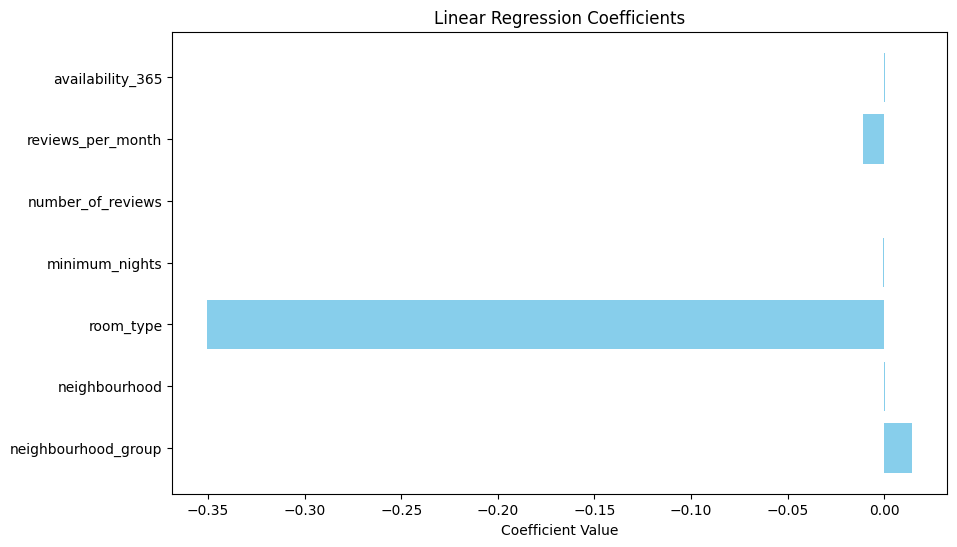

Intercept of the model: 2.163721337367745


In [ ]:
# Coefficient plot
import matplotlib.pyplot as plt
import numpy as np

# Coefficients and intercept from your model
coefficients = reg.coef_
intercept = reg.intercept_

# Feature names (these should be customized based on your model's features)
feature_names = ['neighbourhood_group', 'neighbourhood', 'room_type', 'minimum_nights',
                 'number_of_reviews', 'reviews_per_month', 'availability_365']

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.show()

# Display the intercept
print(f"Intercept of the model: {intercept}")


13798    2.522444
35115    2.542825
40674    1.845098
5525     2.397940
16682    2.096910
           ...   
6661     1.633468
24721    2.041393
36661    2.178977
11591    2.079181
33485    1.875061
Name: price, Length: 6271, dtype: float64
[2.35453388 2.26386464 1.94466948 ... 2.18287095 1.97388107 1.92921316]


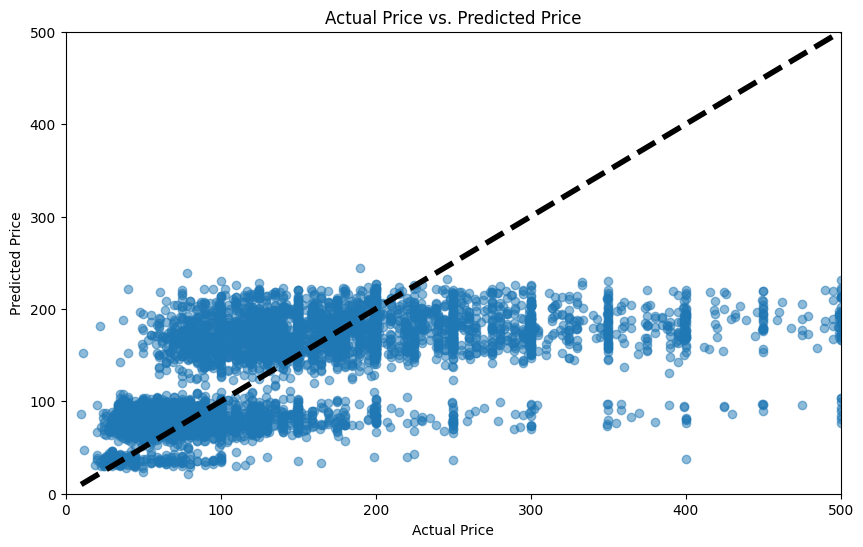

In [ ]:
actual_prices = 10**y_test  # Change this line according to your actual transformation
predicted_prices = 10**y_predicts
print(y_test)
print(y_predicts)
# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_prices, predicted_prices, alpha=0.5)
plt.plot([actual_prices.min(), actual_prices.max()], [actual_prices.min(), actual_prices.max()], 'k--', lw=4)  # Diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs. Predicted Price')
plt.xlim(0,500)
plt.ylim(0,500)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


# Handling categorical and numerical features
categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']
numerical_features = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_prepared = preprocessor.fit_transform(X).toarray()  # Convert to dense array if sparse format is an issue

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=101)

# Building the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for rental prices
])

# Compiling the model
model.compile(optimizer=Adam(), loss='mse')

# Training the model without a separate validation set
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Predicting on the test data
y_pred = model.predict(X_test)

# Transforming predictions and actual values back to the original price scale
actual_prices = np.power(10, y_test)
predicted_prices = np.power(10, y_pred.flatten())

# Evaluating the model
r2 = r2_score(y_test, y_pred.flatten())
mae = mean_absolute_error(y_test, y_pred.flatten())
mse = mean_squared_error(y_test, y_pred.flatten())

print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Epoch 1/100
784/784 [==============================] - 7s 7ms/step - loss: 0.1046
Epoch 2/100
784/784 [==============================] - 5s 6ms/step - loss: 0.0435
Epoch 3/100
784/784 [==============================] - 2s 2ms/step - loss: 0.0437
Epoch 4/100
784/784 [==============================] - 2s 2ms/step - loss: 0.0430
Epoch 5/100
784/784 [==============================] - 2s 3ms/step - loss: 0.0414
Epoch 6/100
784/784 [==============================] - 4s 5ms/step - loss: 0.0406
Epoch 7/100
784/784 [==============================] - 4s 5ms/step - loss: 0.0402
Epoch 8/100
784/784 [==============================] - 4s 5ms/step - loss: 0.0398
Epoch 9/100
784/784 [==============================] - 5s 6ms/step - loss: 0.0394
Epoch 10/100
784/784 [==============================] - 4s 5ms/step - loss: 0.0390
Epoch 11/100
784/784 [==============================] - 3s 3ms/step - loss: 0.0386
Epoch 12/100
784/784 [==============================] - 2s 2ms/step - loss: 0.0387
Epoch 13/100


In [ ]:
# Evaluating the model
r2 = r2_score(y_test, y_pred.flatten())
mae = mean_absolute_error(y_test, y_pred.flatten())
mse = mean_squared_error(y_test, y_pred.flatten())

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.04680200140254882
R2 Score: 0.5223061149892616
Mean Absolute Error: 0.15205878734493977


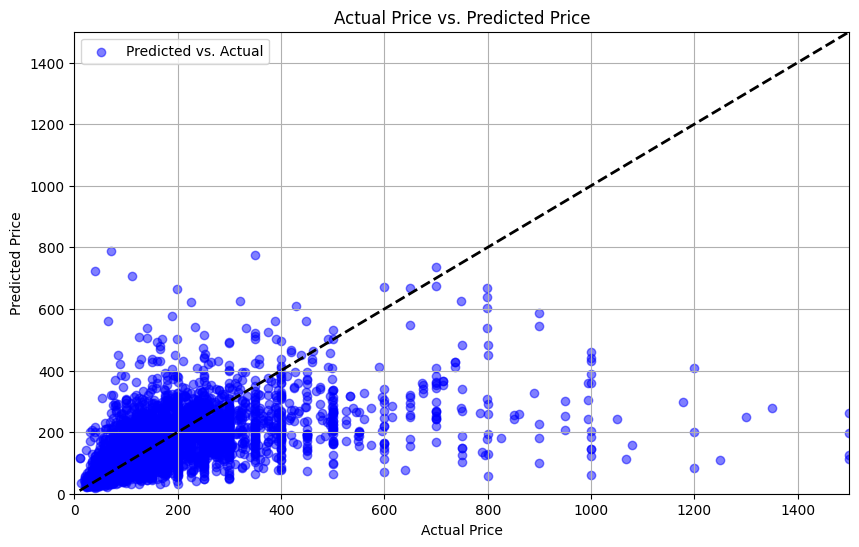

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# If your target was transformed with log10, convert predictions back to the original scale
actual_prices = np.power(10, y_test)
predicted_prices = np.power(10, y_pred.flatten())  # Flatten to convert from 2D to 1D if necessary

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_prices, predicted_prices, alpha=0.5, color='blue', label='Predicted vs. Actual')
plt.plot([actual_prices.min(), actual_prices.max()], [actual_prices.min(), actual_prices.max()], 'k--', lw=2)  # Line for perfect predictions
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs. Predicted Price')
plt.legend()
plt.grid(True)
plt.xlim(0, 1500)  # Limit the x-axis as requested earlier
plt.ylim(0, 1500)  # Limit the y-axis as well
plt.show()